<a href="https://colab.research.google.com/github/jindramachka/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
tf.__version__, keras.__version__

('2.9.2', '2.9.0')

# Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

models = []

4422102/4422102 [==============================] - 0s 0us/step


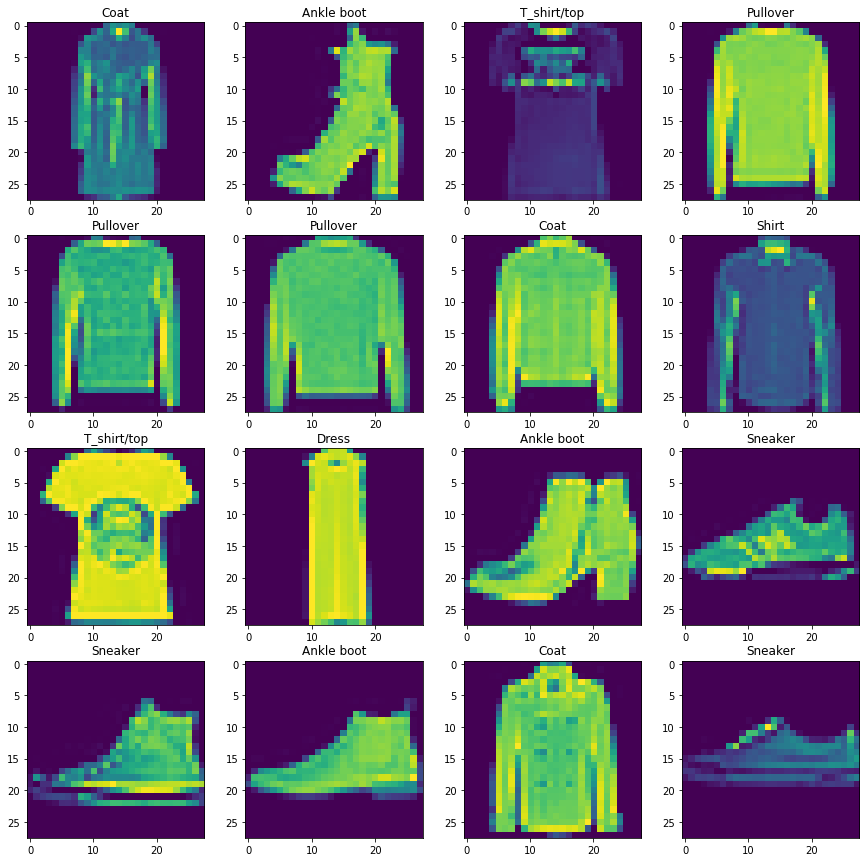

In [3]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(4, 4, figsize = (15, 15))
for row in axes:
  for axe in row:
    i = np.random.randint(len(X_train_full))
    axe.imshow(X_train_full[i])
    axe.set_title(class_names[y_train_full[i]])

In [4]:
model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

models.append(model_1)

In [5]:
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

models.append(model_2)

In [6]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", 
                        input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

models.append(model_3)

In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               1605760   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [9]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 128)       

In [10]:
histories = {model:None for model in models}
for index, model in enumerate(models):
  model.compile(optimizer = "adam",
                loss = "sparse_categorical_crossentropy",
                metrics=["accuracy"])
  
  print(f"Model {index+1}:")
  histories[model] = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))
  print()

Model 1:
Epoch 1/20
1719/1719 [==============================] - 10s 3ms/step - loss: 0.4814 - accuracy: 0.8277 - val_loss: 0.3538 - val_accuracy: 0.8770
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3651 - accuracy: 0.8642 - val_loss: 0.3464 - val_accuracy: 0.8752
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3274 - accuracy: 0.8791 - val_loss: 0.3306 - val_accuracy: 0.8834
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3043 - accuracy: 0.8858 - val_loss: 0.3205 - val_accuracy: 0.8820
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2844 - accuracy: 0.8935 - val_loss: 0.3044 - val_accuracy: 0.8904
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.8993 - val_loss: 0.3315 - val_accuracy: 0.8782
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2575 - accuracy: 0.9031 - val_loss: 0.3364 - val

In [11]:
for index, model in enumerate(models):
  score = model.evaluate(X_test, y_test)
  print(f"Model {index+1}:")
  print(f"Loss: {score[0]}")
  print(f"Accuracy: {score[1]}")
  print()

313/313 [==============================] - 1s 2ms/step - loss: 0.4105 - accuracy: 0.8898
Model 1:
Loss: 0.41051051020622253
Accuracy: 0.8898000121116638

313/313 [==============================] - 1s 3ms/step - loss: 0.6155 - accuracy: 0.9110
Model 2:
Loss: 0.6155451536178589
Accuracy: 0.9110000133514404

313/313 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.9199
Model 3:
Loss: 0.30524325370788574
Accuracy: 0.9199000000953674



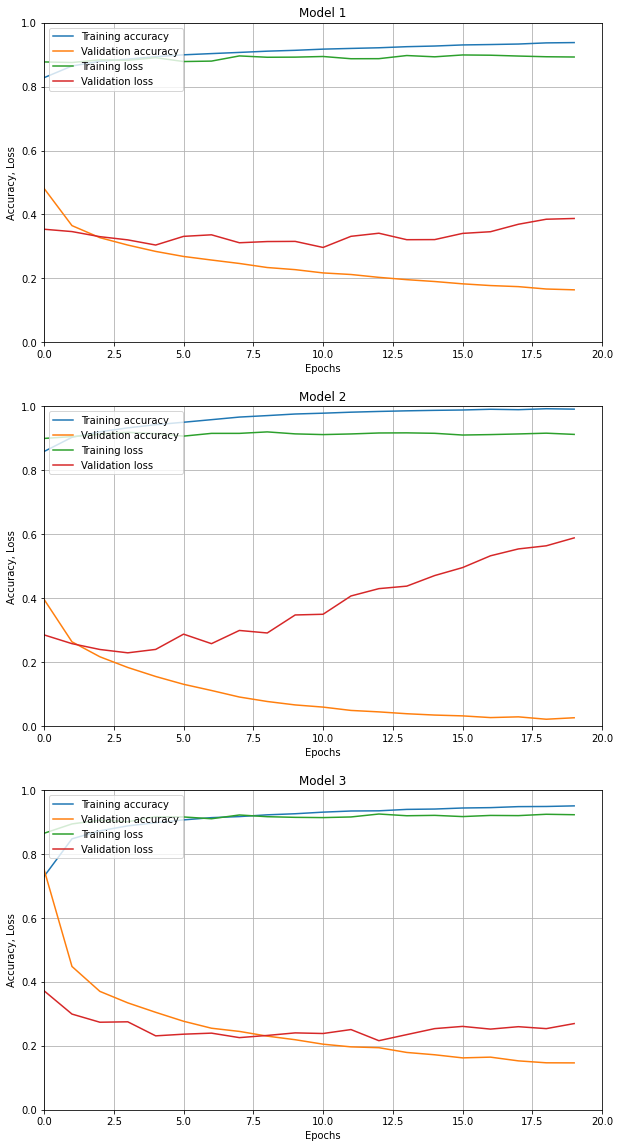

In [12]:
fig, axes = plt.subplots(len(models), 1, figsize = (10, 20))
for index, model in enumerate(models):
  axes[index].set_title(f"Model {index+1}")
  axes[index].set_xlabel('Epochs')
  axes[index].set_ylabel('Accuracy, Loss')
  axes[index].plot(histories[model].history["accuracy"])
  axes[index].plot(histories[model].history["loss"])
  axes[index].plot(histories[model].history["val_accuracy"])
  axes[index].plot(histories[model].history["val_loss"])
  axes[index].grid(True)
  axes[index].set_xlim(0, len(histories[model].epoch))
  axes[index].set_ylim(0, 1)
  axes[index].legend(["Training accuracy", "Validation accuracy", "Training loss", "Validation loss"], loc="upper left")